## Sameer Hans and Emerson Cardoso

## Quantum Circuits on both Simulators and IBM Quantum Computer

In this notebook, we are going to learn how to use Qiskit to define a simple circuit and to execute it on both simulators and the quantum computers of the IBM Quantum Experience.. 

We start by importing the necessary packages.

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
from qiskit.quantum_info import Statevector

## Defining the circuit

We are going to define a very simple circuit: we will use the $H$ gate to put a qubit in superposition and then we will measure it

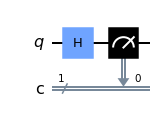

In [2]:
# Let's create a circuit to put a state in superposition and measure it

circ = QuantumCircuit(1,1) # We use one qubit and also one classical bit for the measure result 

circ.h(0) #We apply the H gate

circ.measure(range(1),range(1)) # We measure

circ.draw(output='mpl') #We draw the circuit

## Running the circuit on simulators

Once that we have defined the circuit, we can execute it on a simulator. 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'1': 502, '0': 522}


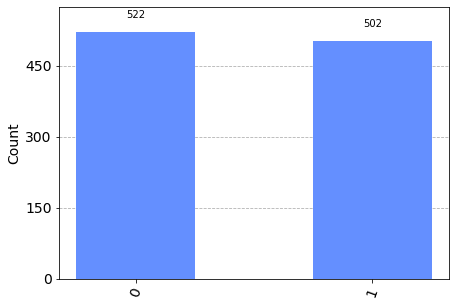

In [3]:
# Executing on the local simulator

backend_sim = Aer.get_backend('qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)



We can also run the circuit run the circuit with a simulator that computes the final state. For that, we need to create a circuit with no measures 

In [4]:
# Execution to the get the statevector

circ2 = QuantumCircuit(1,1)

circ2.h(0)

backend = Aer.get_backend('statevector_simulator') # We change the backend

job = execute(circ2, backend) # We execute the circuit with the new simulator. Now, we do not need repetitions

result = job.result() # We collect the results and access the stavector 
outputstate = result.get_statevector(circ2)
print(outputstate)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Finally, we can also obtain the unitary matrix that represents the action of the circuit

In [5]:
backend = Aer.get_backend('unitary_simulator') # We change the backend again

job = execute(circ2, backend) # We execute the circuit

result = job.result() # We collect the results and obtain the matrix
unitary = result.get_unitary()
print(unitary)


Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


## Running the circuit on Quantum Computer

Now, we are going to use the quantum computers at the IBM Quantum Experience to use our circuit 

One you have created an IBMid account here: https://quantum-computing.ibm.com/

...in the below code, you will need to replace MY API TOKEN with the API number you have save into your clipboard.
Alternatively, you can load the account (if you have saved the Token in a file).

For more details, you can read here: https://github.com/Qiskit/qiskit-ibmq-provider

In [6]:
# Connecting to the real quantum computers
provider = IBMQ.enable_account('43f84db054afb4585657af3a89107672c8d26f702fbe1bb02f333318b686c4178dbc91e4d060ea86905af36bceae2398135b03b1510245d804d28afac82227fa')
provider.backends() # We retrieve the backends to check their status

for b in provider.backends():
    print(b.status().to_dict())

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 4, 'status_msg': 'active'}
{'backend_name': 'ibmq_lima', 'backend_version': '1.0.45', 'operational': True, 'pending_jobs': 4, 'status_msg': 'active'}
{'backend_name': 'ibmq_belem', 'backend_version': '1.2.5', 'operational': True, 'pending_jobs': 28, 'status_msg': 'active'}
{'backend_name': 'ibmq_quito', 'backend_version': '1.1.37', 'operational': True, 'pending_jobs': 10, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 4, 'status_msg': 'active'}
{'backend_name': 'simulator_mps', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 4, 'status_msg': 'active'}
{'backend_name': 'simulator_extended_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 4, 'status_msg': 'active'}
{'backend_name': 'simulator_stabilizer', 'backend_version': '0.1.547', 'operational': 

We can execute the circuit on IBM's quantum simulator (supports up to 32 qubits). We only need to select the appropriate backend.

{'0': 500, '1': 524}


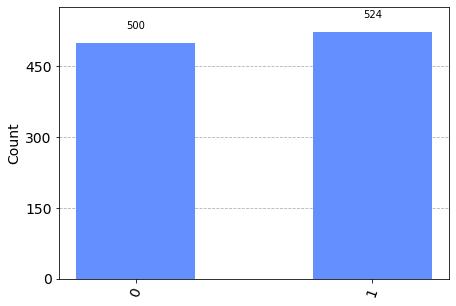

In [7]:
# Executing on the IBM Q Experience simulator

backend_sim = provider.get_backend('ibmq_qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

To execute on one of the real quantum computers, we only need to select it as backend. We will use *job_monitor* to have live information on the job status 

In [8]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open',
project='main')
provider.backends()

ibmqfactory.load_account:WARNING:2023-02-02 09:07:25,502: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
# Executing on the quantum computer

backend = provider.get_backend('ibmq_lima')

job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


When the job is done, we can collect the results and compare them to the ones obtaine with the simulator

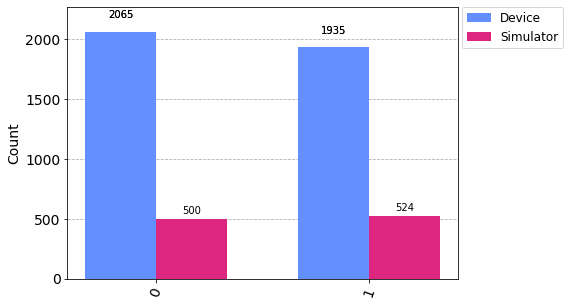

In [10]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

## EXERCISE TO DO

Based on the above notebook, execute both in a simulator and an IBM Quantum Computer the following circuit:

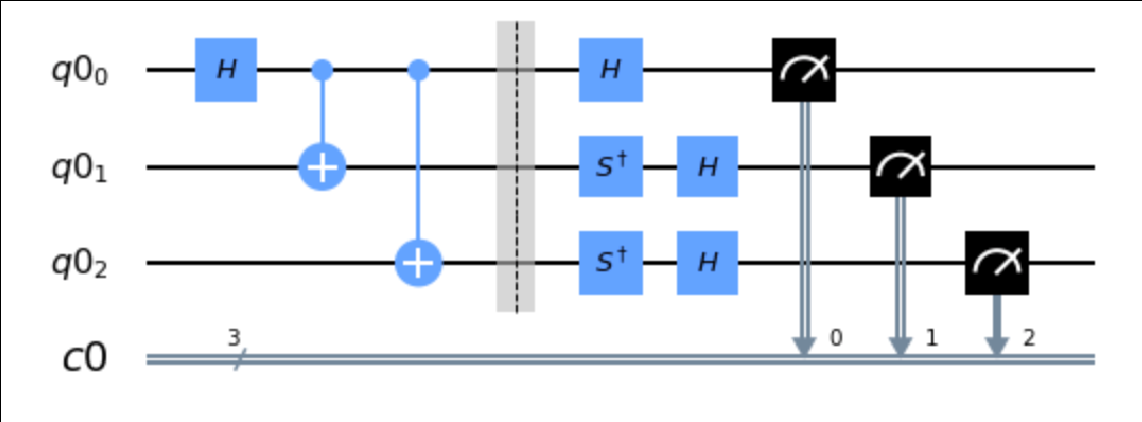

Comment on the final result (state) and provide your interpretation what this quantum circuit is doing.


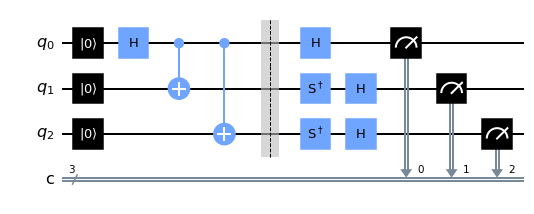

In [11]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi


qreg_q = QuantumRegister(3, 'q')  #3 q
creg_c = ClassicalRegister(3, 'c')  #3 c
circuit = QuantumCircuit(qreg_q, creg_c)

# Put qubit in state |->
circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])

#h-gate
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])

# Use barrier as divider
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])

#h-gate apres barrier
circuit.h(qreg_q[0])

#sdg-gate apres barrier
circuit.sdg(qreg_q[1])
circuit.sdg(qreg_q[2])

#sdg-gate input to h-gate
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

#measure output 
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw(output='mpl')

Count Values 	 {'001': 273, '010': 236, '100': 273, '111': 242}
Output of the F function


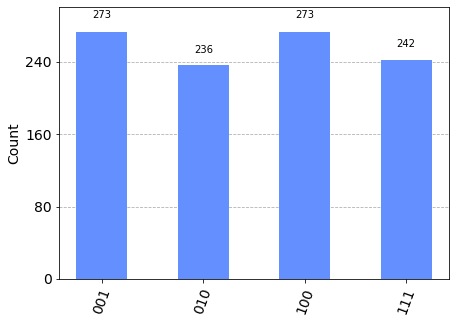

In [12]:
# Executing on the IBM Q Experience simulator
backend_sim = provider.get_backend('ibmq_qasm_simulator') # We choose the backend
job_sim = execute(circuit, backend_sim, shots=1024) # We execute the circuit, selecting th

result_sim = job_sim.result() # We collect the results
counts = result_sim.get_counts(circuit) # We obtain the frequency of each result and we sh

print("Count Values \t",counts)
print("Output of the F function")
plot_histogram(counts)

In [13]:
# Executing on the quantum computer
backend = provider.get_backend('ibmq_lima')
job_exp = execute(circuit, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


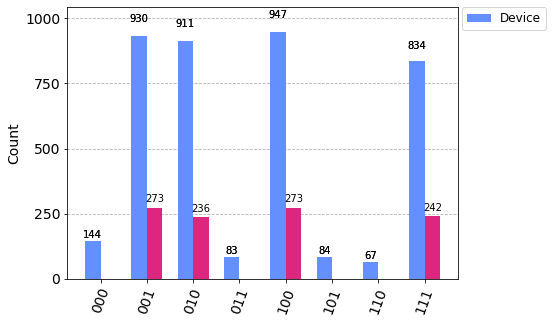

In [14]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circuit)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])


The function F{0,1} -> {0,1} with n=8 only requires 0,1 bits of values and outputs either 0 or 1 with differences between Device and Simulator count. In this scenario, half of the outputs are zero and half of others are one. So, the oracle function described above is a Deutsch-Jozsa algorithm with a balanced oracle.

As we can see, the values of the F function are 001, 010, 100, and 111. Values with extremely low probabilities might be the result of a quantum computer malfunction. When there are an odd number of qubits on 1, this quantum circuit outputs a 1 in the manner of a parity checker.